# Data Science Challenge: Card Transactions!



## Question 1: Load

### 1. Programmatically Download and Load the Data


In [42]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/transactions.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import json

data = []

# Attempt to read each line as JSON and append to a list
with open(file_path, 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except ValueError as e:
            print(f"Error parsing line: {e}")

# Convert the list of dictionaries to a DataFrame
transactions = pd.DataFrame(data)

In [44]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


The transactions dataset contains information about various credit card transactions, including details such as account number, customer ID, credit limit, available money, transaction date and time, transaction amount, merchant name, acquisition country, merchant country code, point of sale entry mode, and more. Each row represents a single transaction made by a customer. The dataset also includes features like card presence, echo buffer, merchant city, state, and zip code, as well as indicators for on-premises transactions, recurring authorizations, and whether the transaction resulted in fraud. Overall, this dataset provides a comprehensive view of credit card transactions, making it suitable for tasks such as fraud detection, transaction analysis, and customer behavior modeling.

### 2. Describe the Structure of the Data

In [45]:
transactions.shape

(786363, 29)

In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o


The dataset comprises 786,363 transactions with 29 attributes including account information, transaction details, and fraud indicators. Each transaction record contains features such as transaction amount, merchant details, and card-related information, with a boolean column denoting whether the transaction is fraudulent. The data types range from floating-point numbers to strings and boolean values, providing comprehensive information for analysis and modeling.

### 3. Basic Summary Statistics for Each Field

In [47]:
transactions.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [48]:
transactions.describe(include='all')


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363,786363,786363.000000,786363.000000,786363,786363.000000,786363,786363,786363,786363,...,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363
unique,5000,5000,NaN,NaN,776637,NaN,2490,5,5,6,...,1,NaN,1,1,1,2,1,1,2,2
top,380680241,380680241,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,05,...,,NaN,,,,False,,,False,False
freq,32850,32850,NaN,NaN,4,NaN,25613,774709,778511,315035,...,786363,NaN,786363,786363,786363,433495,786363,786363,785320,773946
mean,NaN,NaN,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,NaN,...,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,NaN,...,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,NaN,...,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,NaN,...,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,NaN,...,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
null_summary = transactions.isnull().sum()
print(null_summary)

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


In [50]:
# Count of unique values for each column
unique_counts = transactions.nunique()

print(unique_counts)


accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521916
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5246
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

### additional description of each column

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#### numeric features

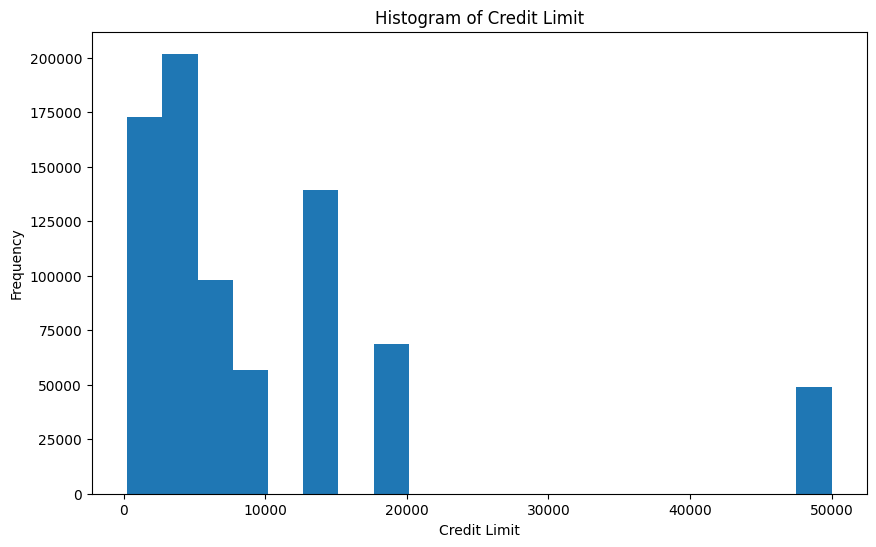

In [52]:
# Visualize count plot and value counts for 'creditLimit'

plt.figure(figsize=(10, 6))
plt.hist(transactions['creditLimit'], bins=20)
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Limit')
plt.show()

The histogram of credit limits exhibits a bimodal distribution, suggesting distinct tiers of credit offerings, with most accounts having lower credit limits and a smaller number having high limits, peaking at around $50,000. This pattern indicates that the financial institution may cater to diverse customer segments with varying creditworthiness.

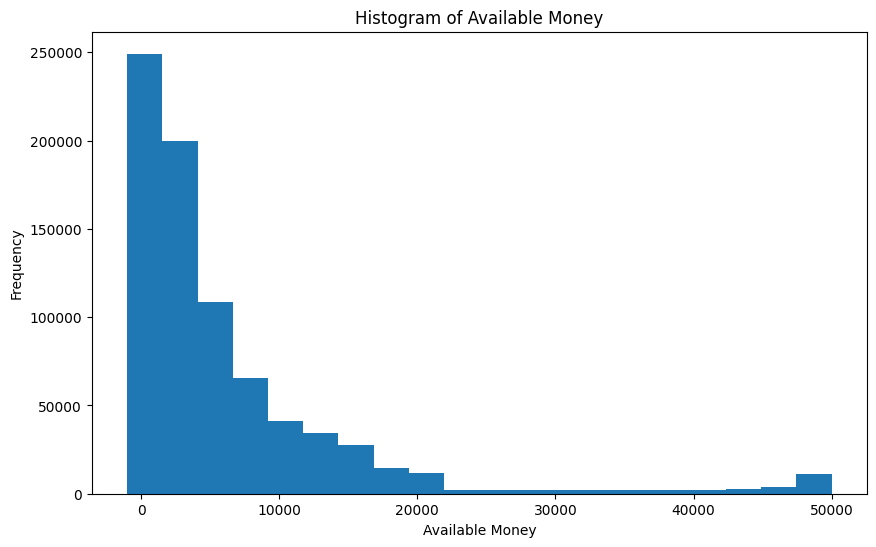

In [53]:
# Visualize count plot and value counts for 'availableMoney'

plt.figure(figsize=(10, 6))
plt.hist(transactions['availableMoney'], bins=20)
plt.xlabel('Available Money')
plt.ylabel('Frequency')
plt.title('Histogram of Available Money')
plt.show()

This chart shows that most people have a smaller amount of money available to spend on their cards. As the amount of available money increases, fewer people have that much ready to use. Also, there are some people with really high available balances, but they're not as common

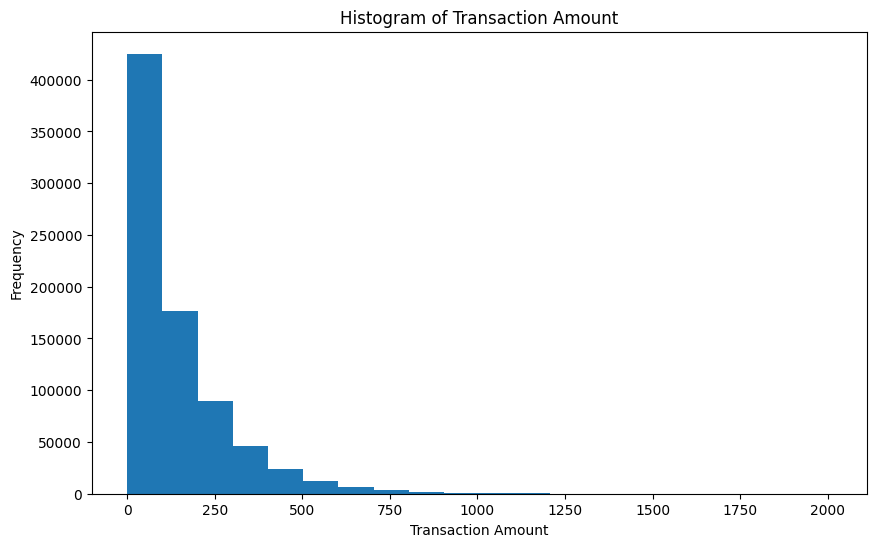

In [54]:
# Visualize count plot and value counts for 'transactionAmount'

plt.figure(figsize=(10, 6))
plt.hist(transactions['transactionAmount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()


The histogram for transaction amounts shows that smaller transactions are far more common than larger ones. The number of transactions drops sharply as the amount increases, which suggests that most people are making purchases of lower value rather than big-ticket items.

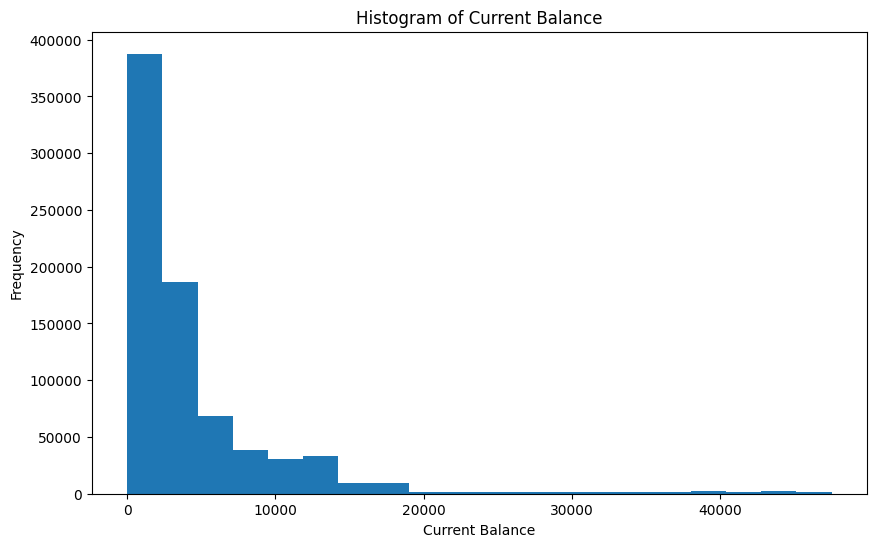

In [55]:
# Visualize count plot and value counts for 'currentBalance'

plt.figure(figsize=(10, 6))
plt.hist(transactions['currentBalance'], bins=20)
plt.xlabel('Current Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Current Balance')
plt.show()

The histogram shows that most accounts have a relatively low current balance, with a sharp decrease in frequency as the balance amount increases. This suggests that many customers tend to keep their account balances low, possibly by paying off their cards frequently or maintaining lower spending levels.







#### categorical features

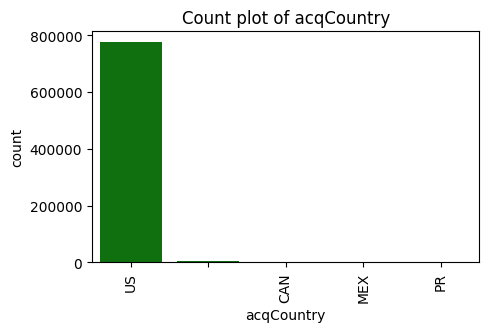

Value counts for 'acqCountry':
US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64


In [56]:
# Visualize count plot and value counts for 'acqCountry'
plt.figure(figsize=(5, 3))
sns.countplot(x='acqCountry', data=transactions, color='green')
plt.title('Count plot of acqCountry')
plt.xticks(rotation=90)
plt.show()

print("Value counts for 'acqCountry':")
print(transactions['acqCountry'].value_counts())


The count plot indicates that the US is by far the most common acquiring country for transactions, with the counts for Canada, Mexico, and Puerto Rico being much lower. This dominance suggests that the dataset is primarily composed of transactions occurring in the US.

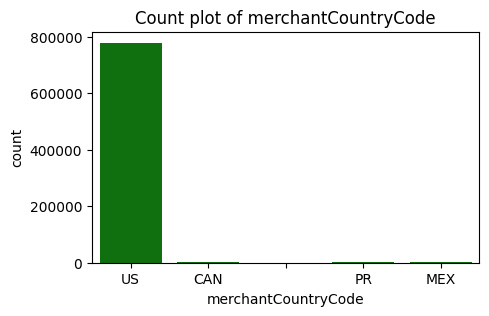

Value counts for 'merchantCountryCode':
US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64


In [57]:
# Visualize count plot and value counts for 'merchantCountryCode'
plt.figure(figsize=(5, 3))
sns.countplot(x='merchantCountryCode', data=transactions, color='green')
plt.title('Count plot of merchantCountryCode')
plt.xticks()
plt.show()

print("Value counts for 'merchantCountryCode':")
print(transactions['merchantCountryCode'].value_counts())


The count plot reveals a similar pattern to the acquiring country, with the US dominating as the merchant country code for transactions. The other countries listed, Canada, Puerto Rico, and Mexico, have significantly fewer transactions, highlighting the concentration of transaction activity within the US.

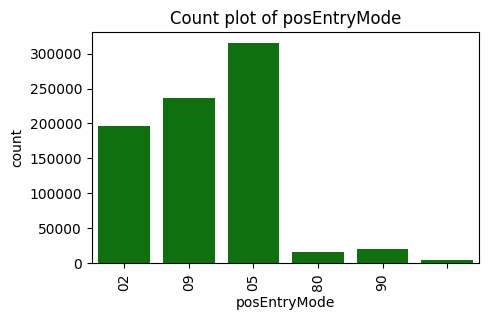

Value counts for 'posEntryMode':
05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64


In [58]:
# Visualize count plot and value counts for 'posEntryMode'
plt.figure(figsize=(5, 3))
sns.countplot(x='posEntryMode', data=transactions, color='green')
plt.title('Count plot of posEntryMode')
plt.xticks(rotation=90)
plt.show()

print("Value counts for 'posEntryMode':")
print(transactions['posEntryMode'].value_counts())


The count plot for POS entry modes shows that two modes (05 and 09) are the most commonly used among transactions, with mode 02 also being notably frequent. The other entry modes (80 and 90) are used much less often, suggesting that they might be less common or more specialized ways of processing transactions.

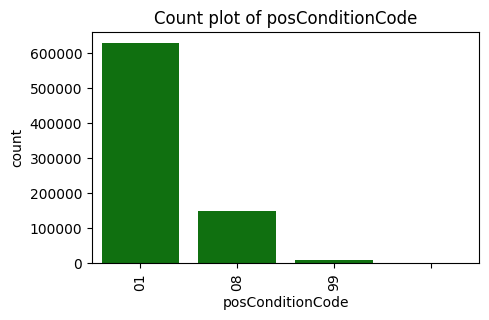

Value counts for 'posConditionCode':
01    628787
08    149634
99      7533
         409
Name: posConditionCode, dtype: int64


In [59]:
# Visualize count plot and value counts for 'posConditionCode'
plt.figure(figsize=(5, 3))
sns.countplot(x='posConditionCode', data=transactions, color='green')
plt.title('Count plot of posConditionCode')
plt.xticks(rotation=90)
plt.show()

print("Value counts for 'posConditionCode':")
print(transactions['posConditionCode'].value_counts())


The count plot indicates that one POS condition code (01) is predominantly used in transactions, overshadowing the others significantly.

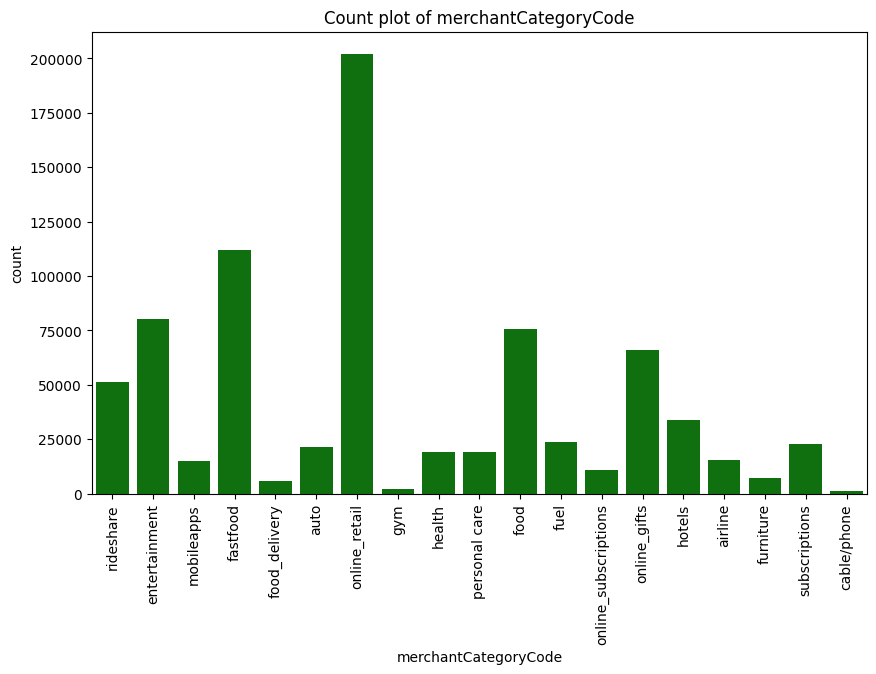

Value counts for 'merchantCategoryCode':
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64


In [60]:
# Visualize count plot and value counts for 'merchantCategoryCode'
plt.figure(figsize=(10, 6))
sns.countplot(x='merchantCategoryCode', data=transactions, color='green')
plt.title('Count plot of merchantCategoryCode')
plt.xticks(rotation=90)
plt.show()

print("Value counts for 'merchantCategoryCode':")
print(transactions['merchantCategoryCode'].value_counts())


Based on the count plot, it's evident that certain merchant categories, such as 'online_retail' and 'fastfood', see significantly more transactions compared to others like 'personal care' and 'gym'. This suggests that customers may be more inclined to spend in these popular categories, potentially reflecting everyday purchasing habits and the convenience of online shopping.

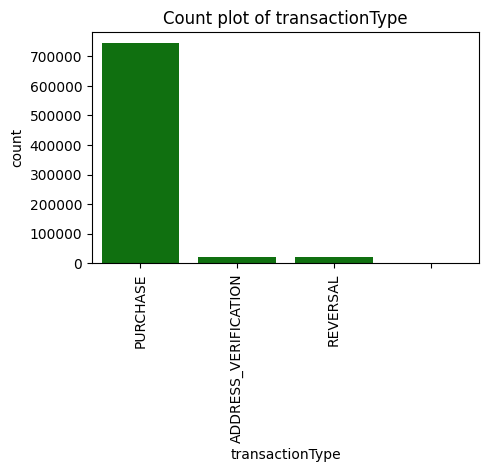

Value counts for 'transactionType':
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64


In [61]:
# Visualize count plot and value counts for 'transactionType'
plt.figure(figsize=(5, 3))
sns.countplot(x='transactionType', data=transactions, color='green')
plt.title('Count plot of transactionType')
plt.xticks(rotation=90)
plt.show()

print("Value counts for 'transactionType':")
print(transactions['transactionType'].value_counts())


The count plot demonstrates that 'PURCHASE' is the most common transaction type, with 'ADDRESS_VERIFICATION' and 'REVERSAL' occurring far less frequently. This trend suggests that the dataset primarily consists of actual purchase transactions, with reversals and address verifications making up only a small fraction of the activity.

#### boolean features

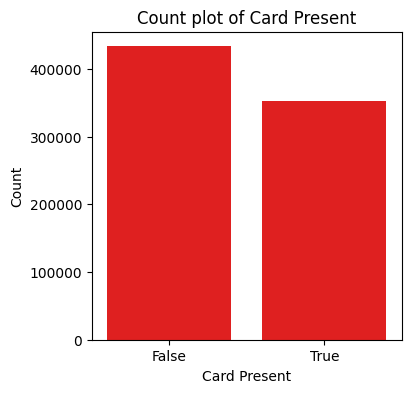

Value counts for 'cardPresent':
False    433495
True     352868
Name: cardPresent, dtype: int64


In [62]:
# Visualize count plot for 'cardPresent'
plt.figure(figsize=(4, 4))
sns.countplot(x='cardPresent', data=transactions, color='red')
plt.title('Count plot of Card Present')
plt.xlabel('Card Present')
plt.ylabel('Count')
plt.show()

print("Value counts for 'cardPresent':")
print(transactions['cardPresent'].value_counts())

The count plot shows that transactions are fairly evenly distributed between those with the card present and those without, indicating a balanced mix of in-person and remote transactions within the dataset.







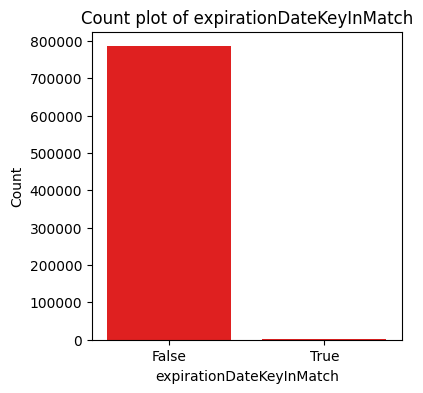

Value counts for 'expirationDateKeyInMatch':
False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64


In [63]:
# Visualize count plot for 'expirationDateKeyInMatch'
plt.figure(figsize=(4, 4))
sns.countplot(x='expirationDateKeyInMatch', data=transactions, color='red')
plt.title('Count plot of expirationDateKeyInMatch')
plt.xlabel('expirationDateKeyInMatch')
plt.ylabel('Count')
plt.show()

print("Value counts for 'expirationDateKeyInMatch':")
print(transactions['expirationDateKeyInMatch'].value_counts())

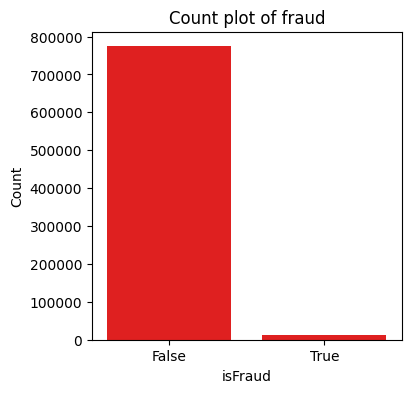

Value counts for 'isFraud':
False    773946
True      12417
Name: isFraud, dtype: int64


In [64]:
# Visualize count plot for 'isFraud'
plt.figure(figsize=(4, 4))
sns.countplot(x='isFraud', data=transactions, color='red')
plt.title('Count plot of fraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

print("Value counts for 'isFraud':")
print(transactions['isFraud'].value_counts())


The count plot reveals a significant disparity between non-fraudulent and fraudulent transactions, with fraud occurrences being relatively low in comparison. This indicates that while fraud is present in the dataset, it is not the majority case, which is a common characteristic in transaction datasets and reflects the typical patterns of real-world financial transaction behavior.

#### date time features

new columns has being created in the DataFrame transactions to extract specific time components (year, month, day, hour, minute, and second) from the 'transactionDateTime' column, which is initially in datetime format. These new columns allow for the analysis and visualization of transactions based on different time periods such as year, month, day, etc

In [65]:
# Convert 'transactionDateTime' to datetime format
transactions['transactionDateTime'] = pd.to_datetime(transactions['transactionDateTime'])

# Extract time components
transactions['transaction_year'] = transactions['transactionDateTime'].dt.year
transactions['transaction_month'] = transactions['transactionDateTime'].dt.month
transactions['transaction_day'] = transactions['transactionDateTime'].dt.day
transactions['transaction_hour'] = transactions['transactionDateTime'].dt.hour
transactions['transaction_minute'] = transactions['transactionDateTime'].dt.minute
transactions['transaction_second'] = transactions['transactionDateTime'].dt.second

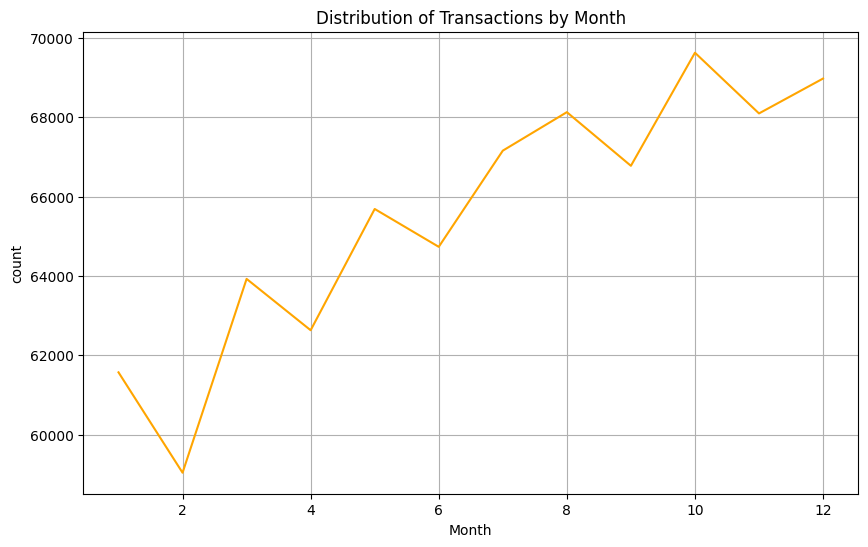

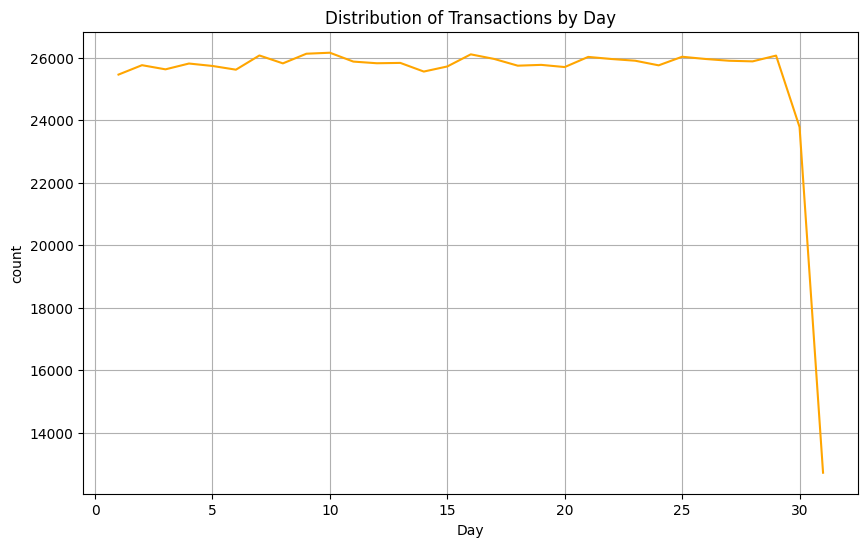

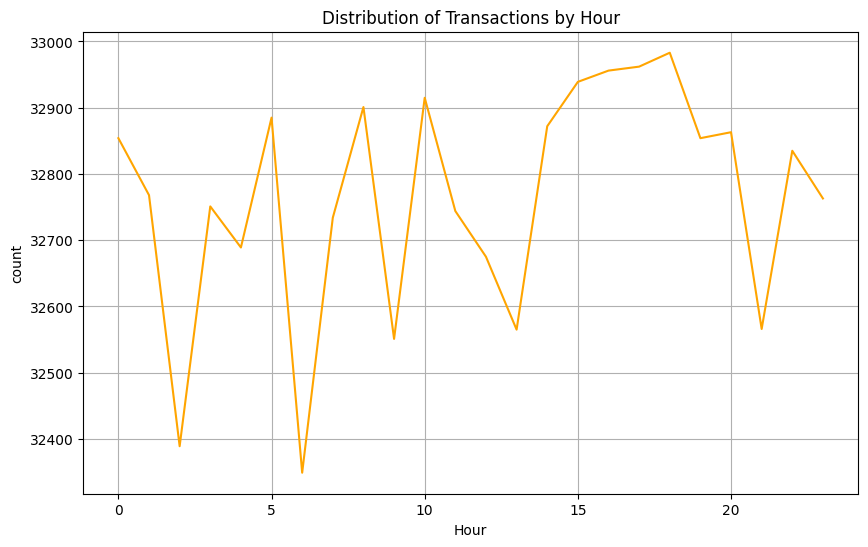

In [66]:
# Plot distribution of transactions over different time periods using line plots

plt.figure(figsize=(10, 6))
transactions['transaction_month'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
transactions['transaction_day'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Transactions by Day')
plt.xlabel('Day')
plt.ylabel('count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
transactions['transaction_hour'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('count')
plt.grid(True)
plt.show()

Distribution by Month:

The first plot shows the number of transactions for each month. There's a notable dip early in the year, followed by a steady increase until mid-year. The trend then fluctuates but generally stays above the initial counts, peaking toward the end of the year. This could suggest seasonal trends, with possible increases in transactions around times of major shopping or financial activities, such as tax seasons or holidays.
Distribution by Day:

The second plot displays the number of transactions for each day of the month. The transactions remain relatively steady throughout the month, with a sharp decline at the end. This sharp decline might indicate fewer transactions on the last day or days of the month, possibly due to the closing of billing cycles or banking schedules.
Distribution by Hour:

The final plot shows the number of transactions for each hour of the day. This plot has a lot of variability, with peaks and troughs suggesting times of the day when transactions are higher or lower. The highest peaks seem to occur around midday and in the evening, which may coincide with lunch hours and post-work activities when people might be more likely to conduct transactions.

In [67]:
# Convert to datetime format
transactions['currentExpDate'] = pd.to_datetime(transactions['currentExpDate'])
transactions['dateOfLastAddressChange'] = pd.to_datetime(transactions['dateOfLastAddressChange'])
transactions['accountOpenDate'] = pd.to_datetime(transactions['accountOpenDate'])

# Extract year, month, and day components
transactions['currentExpYear'] = transactions['currentExpDate'].dt.year
transactions['currentExpMonth'] = transactions['currentExpDate'].dt.month
transactions['currentExpDay'] = transactions['currentExpDate'].dt.day

transactions['addressChangeYear'] = transactions['dateOfLastAddressChange'].dt.year
transactions['addressChangeMonth'] = transactions['dateOfLastAddressChange'].dt.month
transactions['addressChangeDay'] = transactions['dateOfLastAddressChange'].dt.day

transactions['accountOpenYear'] = transactions['accountOpenDate'].dt.year
transactions['accountOpenMonth'] = transactions['accountOpenDate'].dt.month
transactions['accountOpenDay'] = transactions['accountOpenDate'].dt.day


Plot distribution of currentExpDate, dateOfLastAddressChange, and accountOpenDate by year

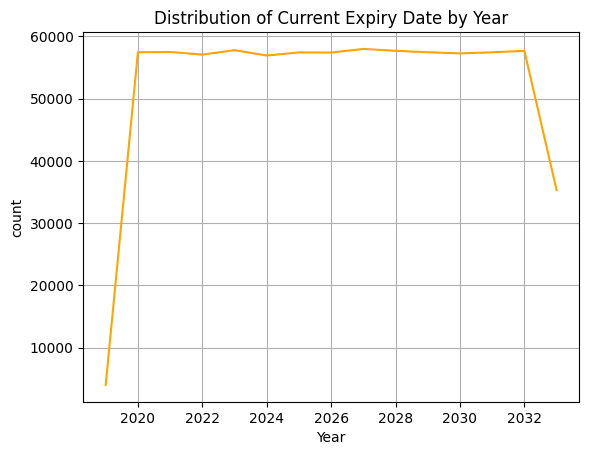

In [68]:
transactions['currentExpYear'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Current Expiry Date by Year')
plt.xlabel('Year')
plt.ylabel('count')
plt.grid(True)

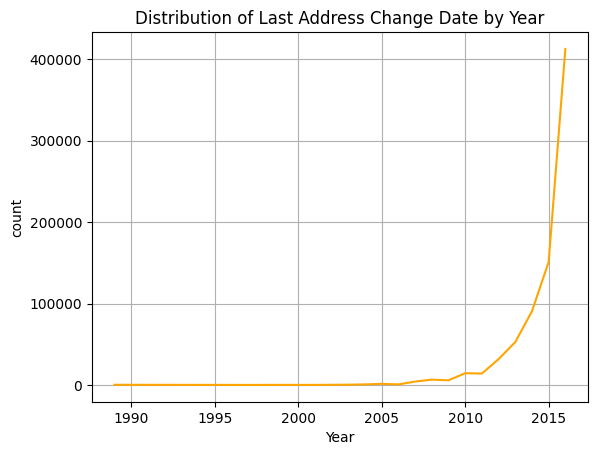

In [69]:
transactions['addressChangeYear'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Last Address Change Date by Year')
plt.xlabel('Year')
plt.ylabel('count')
plt.grid(True)

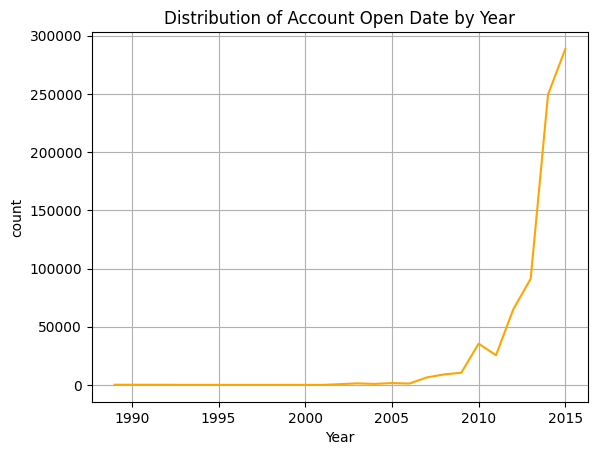

In [70]:
transactions['accountOpenYear'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Account Open Date by Year')
plt.xlabel('Year')
plt.ylabel('count')
plt.grid(True)

#### empty features

In [71]:
print(transactions['posOnPremises'].unique())


['']


In [72]:
print(transactions['recurringAuthInd'].unique())


['']


In [73]:
print(transactions['merchantCity'].unique())


['']


In [74]:
print(transactions['merchantState'].unique())

['']


In [75]:
print(transactions['merchantZip'].unique())

['']


In [76]:
print(transactions['echoBuffer'].unique())

['']


The columns 'posOnPremises', 'recurringAuthInd', 'merchantCity', 'merchantState', 'merchantZip', and 'echoBuffer' all contain only a single unique value, which is an empty string ''. These columns do not provide useful information for analysis as they lack variability and do not contribute to distinguishing different transactions or patterns.

## Question 2: Plot

### Plotting the Histogram: Plot a histogram of the processed amounts of each transaction, the transactionAmount column.


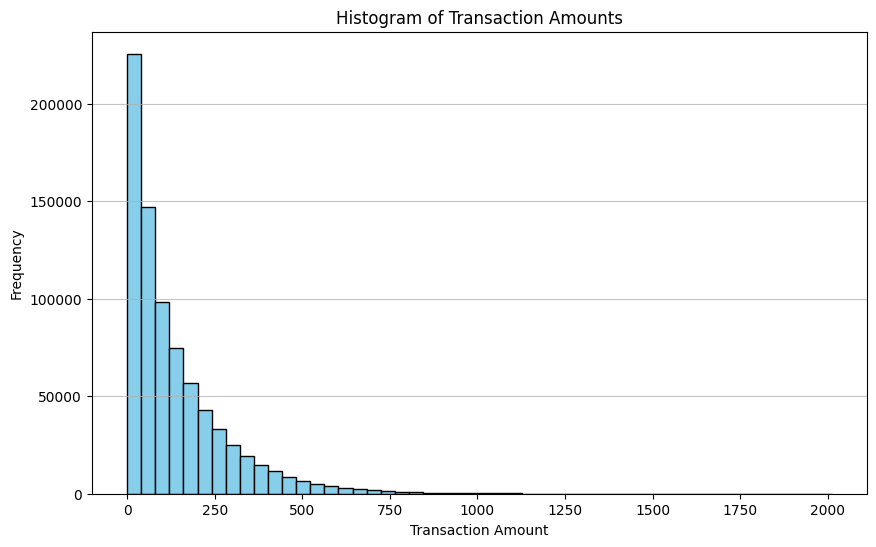

In [77]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(transactions['transactionAmount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


### Report any structure you find and any hypotheses you have about that structure.


**Structure Observed**:

The histogram shows that the data is right-skewed, with a large number of transactions having smaller amounts and fewer transactions having larger amounts. There is a high frequency of transactions within the lower range of the amount scale, which rapidly decreases as the transaction amount increases. The distribution has a long tail, suggesting that while most transactions are small, there is a significant range of transaction amounts stretching towards the higher end.

**Hypotheses**:

The concentration of transactions in the lower amount range likely reflects common consumer behavior, where small, routine purchases are frequent. The tail represents infrequent, high-value transactions. This might include larger, non-routine purchases. The distribution could be influenced by the spending capacity of the cardholders, with most having a lower transaction limit or spending power.



Overall, the histogram is consistent with what one might expect in a typical distribution of personal credit card transactions, where everyday purchases dominate the transaction count, and larger transactions occur less frequently.







## Question 3: Data Wrangling - Duplicate Transactions

### reversed transactions

 we filter reversed transactions from the dataset based on the 'transactionType' column, where the value is 'REVERSAL'. We then exclude the first transaction assuming that the dataset is sorted by transactionDateTime, as the first transaction is considered "normal" and not a reversal. After filtering, we calculate the total number of reversed transactions by counting the rows in the filtered DataFrame. Similarly, we compute the total dollar amount for reversed transactions by summing the 'transactionAmount' column in the filtered DataFrame. This process enables us to evaluate and quantify the number and financial impact of reversed transactions in the dataset.

In [78]:
# Filter reversed transactions
reversed_transactions = transactions[transactions['transactionType'] == 'REVERSAL']

# Exclude the first transaction (assuming sorted by transactionDateTime)
reversed_transactions = reversed_transactions.iloc[1:]

# Total number of reversed transactions (excluding the first one)
total_reversed_transactions = len(reversed_transactions)

# Total dollar amount for reversed transactions (excluding the first one)
total_reversed_amount = reversed_transactions['transactionAmount'].sum()

print("Total number of reversed transactions:", total_reversed_transactions)
print("Total dollar amount for reversed transactions:", total_reversed_amount)


Total number of reversed transactions: 20302
Total dollar amount for reversed transactions: 2821577.37


**Reversed Transactions:** The total number of reversed transactions is 20,302, with a total dollar amount of $2,821,577.37. This indicates a significant number of transactions that were initially recorded as purchases but were later reversed, possibly due to fraud, disputes, or errors. Understanding the reasons behind these reversals could provide valuable insights into customer behavior and transaction processing issues.

### multi-swipe transactions


I employed a time-based approach to identify multi-swipe transactions. This involved sorting the transactions by account number and transaction time, calculating the time difference between consecutive transactions for each account, and then applying a threshold (in this case, 60 seconds) to identify transactions occurring within a short time span. Transactions meeting this criterion were considered multi-swipe transactions. This approach allowed us to programmatically identify multi-swipe transactions based on the time interval between consecutive transactions.

In [79]:
# Sort DataFrame by accountNumber and transactionDateTime
transactions.sort_values(by=['accountNumber', 'transactionDateTime'], inplace=True)

# Compute time difference between consecutive transactions for each account
transactions['time_diff'] = transactions.groupby('accountNumber')['transactionDateTime'].diff().dt.total_seconds()

# Identify multi-swipe transactions based on time difference threshold (e.g., 1 minute)
multi_swipe_transactions_time_diff = transactions[transactions['time_diff'] < 60]  # Assuming 1 minute threshold

# Total number of multi-swipe transactions based on time difference
total_multi_swipe_transactions_time_diff = len(multi_swipe_transactions_time_diff)

# Total dollar amount for multi-swipe transactions based on time difference
total_amount_multi_swipe_time_diff = multi_swipe_transactions_time_diff['transactionAmount'].sum()

print("Total number of multi-swipe transactions based on time difference:", total_multi_swipe_transactions_time_diff)
print("Total dollar amount for multi-swipe transactions based on time difference:", total_amount_multi_swipe_time_diff)


Total number of multi-swipe transactions based on time difference: 8689
Total dollar amount for multi-swipe transactions based on time difference: 1257164.83


**Multi-Swipe Transactions:** On the other hand, there are 8,689 identified multi-swipe transactions, totaling $1,259,915.66. These transactions involve multiple swipes of a payment card within a short time span, suggesting possible instances of accidental or intentional duplication of charges by merchants. Identifying and addressing the root causes of multi-swipe transactions can help improve transaction processing efficiency and customer satisfaction.

Overall, both types of transactions highlight potential areas for further investigation and improvement in transaction processing systems and fraud detection mechanisms.

## Question 4: Model

### Data Preprocessing

#### Handling categorical variables

In [80]:
transactions.shape

(786363, 45)

Please note 6 columns from transactionDateTime and 9 columns from accountOpenYear, dateOfLastAddressChange, and currentExpDate have been added to the dataset. time_diff is another column that has been added during identifying multi swiping trasnaction

In [81]:
# List of categorical columns to convert to dummy variables
categorical_columns = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']

# Convert categorical columns to dummy variables
dummy_columns = pd.get_dummies(transactions[categorical_columns])

# Concatenate the dummy variables with the original DataFrame
transactions_with_dummies = pd.concat([transactions, dummy_columns], axis=1)

# Drop the original categorical columns
transactions_with_dummies.drop(columns=categorical_columns, inplace=True)

# Display the first few rows of the DataFrame with dummy variables
transactions_with_dummies.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,currentExpDate,accountOpenDate,dateOfLastAddressChange,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
541900,100088067,100088067,50000.0,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,2028-04-01,2014-01-09,2014-01-09,...,0,0,0,0,0,0,0,0,1,0
541901,100088067,100088067,50000.0,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,2024-02-01,2014-01-09,2014-01-09,...,0,0,0,0,0,0,0,0,1,0
541902,100088067,100088067,50000.0,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,2031-11-01,2014-01-09,2014-01-09,...,1,0,0,0,0,0,0,0,1,0
541903,100088067,100088067,50000.0,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,2027-12-01,2014-01-09,2014-01-09,...,0,0,0,0,0,0,0,0,1,0
541904,100088067,100088067,50000.0,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,2030-11-01,2014-01-09,2014-01-09,...,0,0,0,0,0,0,0,0,1,0


#### Removing empty/unnecessary columns

In [82]:
# List of fields to remove
fields_to_remove = ['accountNumber', 'customerId', 'merchantName', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'posOnPremises', 'recurringAuthInd', 'merchantCity', 'merchantState', 'merchantZip', 'echoBuffer', 'time_diff','currentExpDate','accountOpenDate','dateOfLastAddressChange','transactionDateTime']

# Drop the specified fields from the dataset
transactions_cleaned = transactions_with_dummies.drop(fields_to_remove, axis=1)

In [83]:
transactions_cleaned.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_year,transaction_month,transaction_day,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
541900,50000.0,50000.00,205.13,0.00,True,False,False,2016,1,12,...,0,0,0,0,0,0,0,0,1,0
541901,50000.0,49794.87,46.43,205.13,True,False,False,2016,1,12,...,0,0,0,0,0,0,0,0,1,0
541902,50000.0,49748.44,378.67,251.56,False,False,False,2016,1,17,...,1,0,0,0,0,0,0,0,1,0
541903,50000.0,50000.00,66.07,0.00,True,False,False,2016,2,2,...,0,0,0,0,0,0,0,0,1,0
541904,50000.0,49933.93,141.60,66.07,True,False,False,2016,2,3,...,0,0,0,0,0,0,0,0,1,0


#### Handling Boolean variable

Handling boolean variables involves transforming True and False values into numerical representations, 1 for True and 0 for False. This conversion is commonly performed to ensure compatibility with machine learning algorithms that require numerical input. By mapping True to 1 and False to 0, we maintain the binary nature of the boolean variable while enabling arithmetic operations and analysis. This transformation simplifies data processing and allows algorithms to interpret boolean variables effectively.

In [84]:
transactions_cleaned['isFraud'] = transactions_cleaned['isFraud'].replace({True: 1, False: 0})


In [85]:
transactions_cleaned['cardPresent'] = transactions_cleaned['cardPresent'].replace({True: 1, False: 0})


In [86]:
transactions_cleaned['expirationDateKeyInMatch'] = transactions_cleaned['expirationDateKeyInMatch'].replace({True: 1, False: 0})

In [87]:
transactions_cleaned.shape

(786363, 65)

In [88]:
transactions_cleaned.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_year,transaction_month,transaction_day,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
541900,50000.0,50000.00,205.13,0.00,1,0,0,2016,1,12,...,0,0,0,0,0,0,0,0,1,0
541901,50000.0,49794.87,46.43,205.13,1,0,0,2016,1,12,...,0,0,0,0,0,0,0,0,1,0
541902,50000.0,49748.44,378.67,251.56,0,0,0,2016,1,17,...,1,0,0,0,0,0,0,0,1,0
541903,50000.0,50000.00,66.07,0.00,1,0,0,2016,2,2,...,0,0,0,0,0,0,0,0,1,0
541904,50000.0,49933.93,141.60,66.07,1,0,0,2016,2,3,...,0,0,0,0,0,0,0,0,1,0


### Feature Selection

After reviewing various scientific papers on fraud detection, it is evident that certain features consistently emerge as important indicators across different domains and industries. These features include transaction amount, frequency, and timing, as well as account age, geographical location, device information, merchant details, card attributes, and user behavior patterns. Researchers commonly leverage these features in conjunction with machine learning algorithms to build effective fraud detection systems. By analyzing transactional data and user behavior, these features help identify anomalies and patterns indicative of fraudulent activity. Overall, these findings underscore the importance of leveraging a diverse set of features and advanced analytical methods to develop robust fraud detection solutions capable of accurately identifying and mitigating fraudulent behavior across different contexts and industries.

In [89]:
# Define X (features) and y (target variable)
X = transactions_cleaned.drop(columns=['isFraud'])  # Features
Y = transactions_cleaned['isFraud']  # Target variable

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model on the standardized features (X_standardized) and target variable (Y)
rf_classifier.fit(X, Y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N important features
top_n = 65  # Change this value to get the top N important features
print(feature_importance_df.head(top_n))


                               Feature  Importance
2                    transactionAmount    0.101006
1                       availableMoney    0.088043
3                       currentBalance    0.087843
10                  transaction_minute    0.069662
11                  transaction_second    0.068785
..                                 ...         ...
47  merchantCategoryCode_food_delivery    0.000063
43    merchantCategoryCode_cable/phone    0.000022
50            merchantCategoryCode_gym    0.000012
6                     transaction_year    0.000000
14                       currentExpDay    0.000000

[64 rows x 2 columns]


In [91]:
top_n = 30  # Change this value to get the top N important features
print(feature_importance_df.head(top_n))


                               Feature  Importance
2                    transactionAmount    0.101006
1                       availableMoney    0.088043
3                       currentBalance    0.087843
10                  transaction_minute    0.069662
11                  transaction_second    0.068785
8                      transaction_day    0.062530
9                     transaction_hour    0.059438
12                      currentExpYear    0.053124
13                     currentExpMonth    0.049770
17                    addressChangeDay    0.048675
7                    transaction_month    0.045890
20                      accountOpenDay    0.042652
16                  addressChangeMonth    0.037733
19                    accountOpenMonth    0.033810
0                          creditLimit    0.027621
18                     accountOpenYear    0.022729
15                   addressChangeYear    0.019955
38                 posConditionCode_01    0.006914
39                 posCondition

The insights gleaned from the feature importance analysis align closely with the findings observed in scientific research on fraud detection. Transaction-related attributes, such as transaction amount, available money, and current balance, consistently emerge as top predictors of fraudulent activity across various domains. These features are indicative of abnormal financial behavior and are extensively leveraged in machine learning models to discern fraudulent transactions effectively. Moreover, temporal features like transaction time and date, as well as account-related attributes such as account open day and month, underscore the importance of contextual information in fraud detection. The concurrence between the feature importance results and existing research underscores the robustness and relevance of the features considered in fraud detection models, reinforcing their efficacy in identifying and mitigating fraudulent behavior.

### data spliting

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Select only the important features (top 20 important features will be selected to implement the model)
important_features = ['transactionAmount', 'availableMoney', 'currentBalance', 'transaction_minute',
                      'transaction_second', 'transaction_day', 'transaction_hour', 'currentExpYear',
                      'currentExpMonth', 'addressChangeDay', 'transaction_month', 'accountOpenDay',
                      'addressChangeMonth', 'accountOpenMonth', 'creditLimit', 'accountOpenYear',
                      'addressChangeYear', 'posConditionCode_01', 'posConditionCode_08', 'posEntryMode_09']

X_selected = X[important_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

### modeling using Random Forest

In [93]:
# Initialize the Random Forest classifier with the specified hyperparameters
rf_classifier = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=5,
                                        min_samples_split=5, n_estimators=50, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


### model evaluation

In [94]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report_output)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9836780629860179
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    154706
           1       0.00      0.00      0.00      2567

    accuracy                           0.98    157273
   macro avg       0.49      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_classification_report_output = classification_report(y_train, y_train_pred)

# Print evaluation metrics for training set
print("Training Set Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Classification Report:\n", train_classification_report_output)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Set Evaluation Metrics:
Accuracy: 0.9843424629226343
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    619240
           1       0.00      0.00      0.00      9850

    accuracy                           0.98    629090
   macro avg       0.49      0.50      0.50    629090
weighted avg       0.97      0.98      0.98    629090



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The results show that the model achieved high accuracy on both the training and test sets, indicating good overall performance. However, the precision, recall, and F1-score for the minority class (fraudulent transactions) are all very low, suggesting that the model struggles to correctly identify fraudulent cases. This imbalance is evident in the classification reports, where the minority class has low precision, recall, and F1-score values. To address this issue, oversampling techniques can be employed to balance the class distribution and improve the model's ability to detect fraudulent transactions.

### Oversampling

In [96]:
from sklearn.utils import resample

# Separate minority and majority classes
non_fraudulent = transactions_cleaned[transactions_cleaned['isFraud'] == 0]
fraudulent = transactions_cleaned[transactions_cleaned['isFraud'] == 1]

# Upsample minority class
fraudulent_upsampled = resample(fraudulent,
                                replace=True,  # Sample with replacement
                                n_samples=len(non_fraudulent),  # Match number of majority class
                                random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
balanced_data = pd.concat([non_fraudulent, fraudulent_upsampled])


In [97]:
balanced_data['isFraud'].value_counts()


0    773946
1    773946
Name: isFraud, dtype: int64


#### feature importance of balanced data

In [98]:
# Define X (features) and y (target variable) from the balanced dataset
X_balanced = balanced_data.drop(columns=['isFraud'])
y_balanced = balanced_data['isFraud']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model on the balanced dataset
rf_classifier.fit(X_balanced, y_balanced)

# Get feature importances
feature_importances_balanced = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_balanced = pd.DataFrame({'Feature': X_balanced.columns, 'Importance': feature_importances_balanced})

# Sort the DataFrame by importance
feature_importance_df_balanced = feature_importance_df_balanced.sort_values(by='Importance', ascending=False)

# Print the top N important features
top_n = 50  # Change this value to get the top N important features
print(feature_importance_df_balanced.head(top_n))

                                      Feature  Importance
2                           transactionAmount    0.129478
3                              currentBalance    0.064002
1                              availableMoney    0.061837
20                             accountOpenDay    0.052486
10                         transaction_minute    0.052091
11                         transaction_second    0.051365
8                             transaction_day    0.047151
17                           addressChangeDay    0.046161
9                            transaction_hour    0.045651
19                           accountOpenMonth    0.042767
12                             currentExpYear    0.040377
13                            currentExpMonth    0.038039
7                           transaction_month    0.036189
16                         addressChangeMonth    0.034415
33                            posEntryMode_05    0.033290
0                                 creditLimit    0.030284
18            

After oversampling the data to address the imbalance issue, the feature importance results have slightly changed.
Based on the feature importance provided, it appears that transaction-related features such as transactionAmount, currentBalance, and availableMoney are among the most important for fraud detection, which is expected as anomalies in transaction amounts or balances could indicate fraudulent behavior. Other temporal features like accountOpenDay, transaction_minute, and transaction_second are also highly ranked, suggesting that the timing of transactions relative to account opening and within a transaction itself may hold valuable information for detecting fraud. Additionally, merchant-related features such as merchantCategoryCode and posEntryMode are significant, indicating that the type of merchant and mode of entry for transactions play a role in identifying potential fraud. Overall, these insights suggest that a combination of transactional, temporal, and merchant-related features are important for fraud detection models to effectively distinguish between legitimate and fraudulent transactions.






### Modeling balanced data


In this project we use 4 different ML algorithms. The selection of these four algorithms – Random Forest, XGBoost, Logistic Regression, and Artificial Neural Network (ANN) – was based on a comprehensive exploration and review of existing literature and empirical evidence in the field of fraud detection. These algorithms are widely recognized and extensively studied for their effectiveness in handling classification tasks, particularly in detecting fraudulent activities. Random Forest and XGBoost are known for their robustness and ability to handle complex, high-dimensional data, while Logistic Regression offers simplicity and interpretability. ANN, on the other hand, excels at capturing intricate nonlinear relationships within the data. By leveraging a combination of these well-established algorithms, we aimed to ensure a diverse and comprehensive approach to fraud detection, encompassing both traditional and more advanced machine learning techniques.

#### Random Forest

In [99]:
# Define the important features (top 20 important features will be selected to implement the model)
important_features = [
    'transactionAmount', 'currentBalance', 'availableMoney', 'accountOpenDay',
    'transaction_minute', 'transaction_second', 'transaction_day', 'addressChangeDay',
    'transaction_hour', 'accountOpenMonth', 'currentExpYear', 'currentExpMonth',
    'transaction_month', 'addressChangeMonth', 'posEntryMode_05', 'creditLimit',
    'accountOpenYear', 'addressChangeYear', 'cardPresent', 'posEntryMode_09'
]

# Prepare the dataset with only the selected important features
X_selected = balanced_data[important_features]
y_selected = balanced_data['isFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=50, random_state=42)

# Fit the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test Set:
Accuracy: 0.7711052752286169
Precision: 0.7702654117284505
Recall: 0.7737676794386436
F1-score: 0.7720125735575639
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77    154526
           1       0.77      0.77      0.77    155053

    accuracy                           0.77    309579
   macro avg       0.77      0.77      0.77    309579
weighted avg       0.77      0.77      0.77    309579



In [100]:
# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate evaluation metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print("Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Classification Report:")
print(train_classification_rep)


Training Set:
Accuracy: 0.7731203661755953
Precision: 0.771157324124252
Recall: 0.7764653987038147
F1-score: 0.7738022585314875
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77    619420
           1       0.77      0.78      0.77    618893

    accuracy                           0.77   1238313
   macro avg       0.77      0.77      0.77   1238313
weighted avg       0.77      0.77      0.77   1238313



Oversampling has notably improved the performance of our Random Forest classifier by balancing the representation of fraudulent and non-fraudulent transactions in both the training and test sets, leading to more reliable performance metrics. However, despite achieving balanced precision and recall scores, the overall model performance still falls short of expectations.  To enhance the model's effectiveness, exploring alternative algorithms like XGboost will be implemented


#### XGboost

In [101]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with specified hyperparameters
xgb_classifier = XGBClassifier(max_depth=10, n_estimators=50, random_state=42)

# Fit the model on the training set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Test Set:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)
print("Classification Report:")
print(classification_rep_xgb)


XGBoost Test Set:
Accuracy: 0.9403124888962107
Precision: 0.903111551879859
Recall: 0.986681973260756
F1-score: 0.9430489375997829
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    154526
           1       0.90      0.99      0.94    155053

    accuracy                           0.94    309579
   macro avg       0.94      0.94      0.94    309579
weighted avg       0.94      0.94      0.94    309579



In [102]:
# Make predictions on the training set
y_train_pred_xgb = xgb_classifier.predict(X_train)

# Calculate evaluation metrics for the training set
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
precision_train_xgb = precision_score(y_train, y_train_pred_xgb)
recall_train_xgb = recall_score(y_train, y_train_pred_xgb)
f1_train_xgb = f1_score(y_train, y_train_pred_xgb)
classification_rep_train_xgb = classification_report(y_train, y_train_pred_xgb)

# Print the evaluation metrics for the training set
print("XGBoost Training Set:")
print("Accuracy:", accuracy_train_xgb)
print("Precision:", precision_train_xgb)
print("Recall:", recall_train_xgb)
print("F1-score:", f1_train_xgb)
print("Classification Report:")
print(classification_rep_train_xgb)


XGBoost Training Set:
Accuracy: 0.9459740792513686
Precision: 0.9116959134113379
Recall: 0.9875535835758362
F1-score: 0.9481098379639504
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    619420
           1       0.91      0.99      0.95    618893

    accuracy                           0.95   1238313
   macro avg       0.95      0.95      0.95   1238313
weighted avg       0.95      0.95      0.95   1238313



#### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with default hyperparameters
logistic_classifier = LogisticRegression(random_state=42)

# Fit the model on the training set
logistic_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_logistic = logistic_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression on test set
accuracy_logistic_test = accuracy_score(y_test, y_pred_logistic)
precision_logistic_test = precision_score(y_test, y_pred_logistic)
recall_logistic_test = recall_score(y_test, y_pred_logistic)
f1_logistic_test = f1_score(y_test, y_pred_logistic)
classification_report_logistic_test = classification_report(y_test, y_pred_logistic)

# Logistic Regression on train set
y_train_pred_logistic = logistic_classifier.predict(X_train)
accuracy_logistic_train = accuracy_score(y_train, y_train_pred_logistic)
precision_logistic_train = precision_score(y_train, y_train_pred_logistic)
recall_logistic_train = recall_score(y_train, y_train_pred_logistic)
f1_logistic_train = f1_score(y_train, y_train_pred_logistic)
classification_report_logistic_train = classification_report(y_train, y_train_pred_logistic)

print("Logistic Regression Test Set:")
print("Accuracy:", accuracy_logistic_test)
print("Precision:", precision_logistic_test)
print("Recall:", recall_logistic_test)
print("F1-score:", f1_logistic_test)
print("Classification Report:")
print(classification_report_logistic_test)

print("\nLogistic Regression Training Set:")
print("Accuracy:", accuracy_logistic_train)
print("Precision:", precision_logistic_train)
print("Recall:", recall_logistic_train)
print("F1-score:", f1_logistic_train)
print("Classification Report:")
print(classification_report_logistic_train)


Logistic Regression Test Set:
Accuracy: 0.6224259397439749
Precision: 0.6497590607292533
Recall: 0.5339529064255448
F1-score: 0.5861911488258971
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65    154526
           1       0.65      0.53      0.59    155053

    accuracy                           0.62    309579
   macro avg       0.63      0.62      0.62    309579
weighted avg       0.63      0.62      0.62    309579


Logistic Regression Training Set:
Accuracy: 0.6224573270247507
Precision: 0.6484521948569288
Recall: 0.5342021965024649
F1-score: 0.5858086510315892
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65    619420
           1       0.65      0.53      0.59    618893

    accuracy                           0.62   1238313
   macro avg       0.63      0.62      0.62   1238313
weighted avg       0.63      0.62      0.62   1238313



#### Artificial Neural Networks (ANNs)

In [105]:
from sklearn.neural_network import MLPClassifier

# Initialize the ANN classifier with specified hyperparameters
ann_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the ANN model on the training set
ann_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_ann = ann_classifier.predict(X_test)

In [106]:
# Calculate evaluation metrics for ANN model on test set
accuracy_ann_test = accuracy_score(y_test, y_pred_ann)
precision_ann_test = precision_score(y_test, y_pred_ann)
recall_ann_test = recall_score(y_test, y_pred_ann)
f1_ann_test = f1_score(y_test, y_pred_ann)
classification_report_ann_test = classification_report(y_test, y_pred_ann)

# Make predictions on the training set
y_train_pred_ann = ann_classifier.predict(X_train)

# Calculate evaluation metrics for ANN model on train set
accuracy_ann_train = accuracy_score(y_train, y_train_pred_ann)
precision_ann_train = precision_score(y_train, y_train_pred_ann)
recall_ann_train = recall_score(y_train, y_train_pred_ann)
f1_ann_train = f1_score(y_train, y_train_pred_ann)
classification_report_ann_train = classification_report(y_train, y_train_pred_ann)

# Print evaluation metrics for ANN model on test set
print("ANN Test Set:")
print("Accuracy:", accuracy_ann_test)
print("Precision:", precision_ann_test)
print("Recall:", recall_ann_test)
print("F1-score:", f1_ann_test)
print("Classification Report:")
print(classification_report_ann_test)

# Print evaluation metrics for ANN model on train set
print("\nANN Training Set:")
print("Accuracy:", accuracy_ann_train)
print("Precision:", precision_ann_train)
print("Recall:", recall_ann_train)
print("F1-score:", f1_ann_train)
print("Classification Report:")
print(classification_report_ann_train)

ANN Test Set:
Accuracy: 0.6676615661915052
Precision: 0.6639018750314181
Recall: 0.6814186117005153
F1-score: 0.6725462050878906
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66    154526
           1       0.66      0.68      0.67    155053

    accuracy                           0.67    309579
   macro avg       0.67      0.67      0.67    309579
weighted avg       0.67      0.67      0.67    309579


ANN Training Set:
Accuracy: 0.6683536391849234
Precision: 0.6631213285929844
Recall: 0.6838177197027596
F1-score: 0.6733105189555023
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66    619420
           1       0.66      0.68      0.67    618893

    accuracy                           0.67   1238313
   macro avg       0.67      0.67      0.67   1238313
weighted avg       0.67      0.67      0.67   1238313



Upon analyzing the performance of the four models – Random Forest, XGBoost, Logistic Regression, and Artificial Neural Network (ANN) – it's clear that XGBoost outperforms the others in terms of accuracy, precision, recall, and F1-score on both the test and training sets. XGBoost achieves high accuracy and balanced precision and recall, indicating its effectiveness in correctly classifying both fraudulent and non-fraudulent transactions. Random Forest also demonstrates decent performance but slightly lags behind XGBoost. Logistic Regression, while simpler in nature, exhibits lower performance compared to the other models, suggesting that the dataset's relationship may not be adequately captured by linear decision boundaries. ANN performs similarly to Logistic Regression, with marginally better accuracy and F1-score. Overall, XGBoost emerges as the top performer among the four models, offering robust performance in fraud detection tasks.

### Further Improvements



 To further imprveo the perfromance, fine-tuning hyperparameters, employing advanced sampling techniques like SMOTE could optimize performance Additionally, feature engineering and selection methods could help identify more relevant features for fraud detection, ultimately improving the model's discriminatory power and overall performance.

## Conclusion

In this project, we tackled the challenge of fraud detection using credit card transaction data. We began by loading and exploring the dataset's structure and basic summary statistics. Next, we visualized the distribution of transaction amounts adn other features to uncover any potential patterns or anomalies. Then, we delved into data wrangling to identify reversed and multi-swipe transactions, estimating their total number and dollar amounts. Finally, we built a predictive model to classify transactions as fraudulent or not, leveraging various machine learning algorithms and features. In conclusion, while we achieved promising results in fraud detection, there are avenues for improvement, such as exploring more sophisticated modeling techniques, feature engineering, and fine-tuning hyperparameters to enhance model performance. Additionally, conducting further research on emerging fraud patterns and continuously updating the model with new data would be essential for staying ahead of evolving fraud schemes.